`63070501061 S.RAKNA`

# 3. Gasoline

> 10 points.

#### 2.1 Show the equation found by fitting the training data:
$y=f(x_1,x_2,x_3,x_4)=a_0+a_1x_1+a_2x_2+a_3x_3+a_4x_4$

In [1]:
import re

import pandas as pd

In [2]:
# read the text file
with open('gasoline_use.txt', 'r') as file:
    data = file.read()

# extract the tabular data
table = re.findall(
    r'\d+\s+\d+\s+[\d\.]+\s+[\d\.]+\s+[\d\.]+\s+[\d\.]+\s+[\d\.]+', data)

# create a DataFrame
df = pd.DataFrame([row.split() for row in table], columns=['Index', 'One', 'Gasoline_tax', 'Average_income',
                  'Paved_highways', 'Proportion_of_population_with_driver_licenses', 'Consumption_of_gasoline'])

# convert columns to appropriate types
df['Gasoline_tax'] = df['Gasoline_tax'].astype(float)
df['Average_income'] = df['Average_income'].astype(int)
df['Paved_highways'] = df['Paved_highways'].astype(int)
df['Proportion_of_population_with_driver_licenses'] = df['Proportion_of_population_with_driver_licenses'].astype(
    float)
df['Consumption_of_gasoline'] = df['Consumption_of_gasoline'].astype(int)

# drop the 'One' and 'Index' column
df.drop('One', axis=1, inplace=True)
df.drop('Index', axis=1, inplace=True)

# print the DataFrame
print(df)

    Gasoline_tax  Average_income  Paved_highways  \
0           9.00            3571            1976   
1           9.00            4092            1250   
2           9.00            3865            1586   
3           7.50            4870            2351   
4           8.00            4399             431   
5          10.00            5342            1333   
6           8.00            5319           11868   
7           8.00            5126            2138   
8           8.00            4447            8577   
9           7.00            4512            8507   
10          8.00            4391            5939   
11          7.50            5126           14186   
12          7.00            4817            6930   
13          7.00            4207            6580   
14          7.00            4332            8159   
15          7.00            4318           10340   
16          7.00            4206            8508   
17          7.00            3718            4725   
18          

In [3]:
#      I,  the index;
#      A0, 1; - used for intercept purposes. Can be ignored if fitting also finds intercept.
#      A1, the gasoline tax ($);
#      A2, the per capita income ($);
#      A3, the number of miles of paved highway (miles);
#      A4, the proportion of drivers (%);
#      B,  the consumption of gasoline (gallons).
#
#    We seek a model of the form
#
#      B = A0 * X0 + A1 * X1 + A2 * X2 + A3 * X3 + A4 * X4.

# Split the data into training and test sets. (0.8, 0.2) split.
train = df.sample(frac=0.8, random_state=200)
test = df.drop(train.index)

# The predicted column is "Consumption_of_gasoline"
y_name = "Consumption_of_gasoline"

# The feature columns are all the other columns
x_names = list(df.columns)
x_names.remove(y_name)

In [4]:
# Fitting training data as y = A0 + A1 * X1 + A2 * X2 + A3 * X3 + A4 * X4
# The model will find the coefficients A0, A1, A2, A3, A4

# Import the linear regression model
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model to the training data
model.fit(train[x_names], train[y_name])

# Print the coefficients
coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}\n")
print(f"y = {intercept} + {coefficients[0]} * x_1 + {coefficients[1]} * x_2 + {coefficients[2]} * x_3 + {coefficients[3]} * x_4")

Coefficients: [-3.99857337e+01 -5.77254110e-02 -4.37813717e-03  1.29275589e+03]
Intercept: 417.6624801331175

y = 417.6624801331175 + -39.98573367099619 * x_1 + -0.057725410954853076 * x_2 + -0.0043781371723111565 * x_3 + 1292.7558862173669 * x_4


> 5 points.

#### 2.2 What is the $R^2$ for the **prediction** of y? Use testing data.

In [5]:
# Predict the test data
predictions = model.predict(test[x_names])

# Print R^2 for the model on the test data
from sklearn.metrics import r2_score

r2 = r2_score(test[y_name], predictions)

print(f"R^2 for prediction: {r2}")

R^2 for prediction: 0.3929084690649357


> 5 points.

#### 2.2 What would happen to gasoline consumption if taxes are increased by $2.00? Use training data.

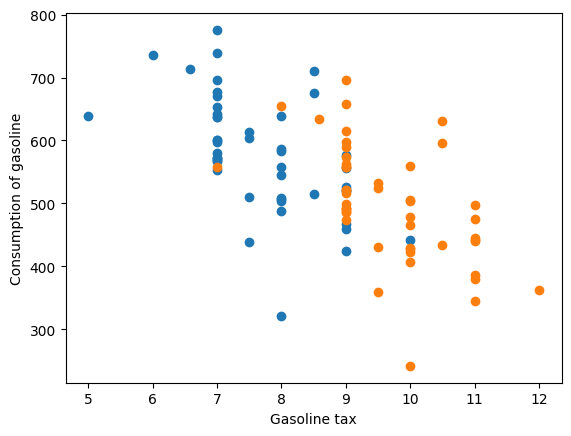

In [6]:
# Create new column = tax + 2
import matplotlib.pyplot as plt
df['Gasoline_tax_increased'] = df['Gasoline_tax'] + 2


def compute_consumption(x):
    return intercept + coefficients[0] * x + coefficients[1] * df['Average_income'] + \
        coefficients[2] * df['Paved_highways'] + coefficients[3] * \
        df['Proportion_of_population_with_driver_licenses']


# Plot y(..., tax, ...) and y(..., tax + 2, ...) points
y_tax = compute_consumption(df['Gasoline_tax'])
y_tax_increased = compute_consumption(df['Gasoline_tax_increased'])


# plot the points with color labels
plt.scatter(df['Gasoline_tax'], y_tax, label='Gasoline tax')
plt.scatter(df['Gasoline_tax_increased'], y_tax_increased, label='Gasoline tax increased')
plt.xlabel('Gasoline tax')
plt.ylabel('Consumption of gasoline')
plt.show()


<p style="color:red">The plots above suggest that the orange group experiences a negative shift, indicating that an increase in taxes is associated with a decrease in consumption. <br/>This can also be inferred from the equation in the first question, which shows a negative value for the tax coefficient.</p>